## Huggingface version (Torch)

In [7]:
import torch
from transformers import AutoModelForCausalLM


device                   = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch, seq_len, channels = 4, 512, 3  # channels 
series                   = torch.randn(batch, seq_len, channels, dtype=torch.float32).to(device)
torch.manual_seed(42)

model_path = 'SequentialLearning/SuperLinear'
model = AutoModelForCausalLM.from_pretrained(model_path,trust_remote_code=True, force_download=True).to(device)

with torch.no_grad():
    output = model(inputs_embeds=series)
    preds  = output.logits 

/home/lirannoc/.conda/envs/timemoe/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/lirannoc/.conda/envs/timemoe/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Experts: dict_keys(['mean', 'naive', '1/4', '1/6', '1/7', '1/8', '1/12', '1/14', '1/16', '1/21', '1/24', '1/28', '1/30', '1/32', '1/36', '1/42', '1/48', '1/52', '1/56', '1/60', '1/72', '1/84', '1/90', '1/96', '1/120', '1/144', '1/168', '1/180', '1/224', '1/252', '1/288', '1/336', '1/365', '1/504', '1/672', '1/1008', '1/1440', '1/2016', '1/3600', 'comp_0', 'comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5', 'comp_6', 'comp_7', 'comp_8', 'comp_9', 'comp_10', 'comp_11'])


In [1]:

from transformers import AutoModelForCausalLM

model_path = 'SequentialLearning/SuperLinear'
model = AutoModelForCausalLM.from_pretrained(model_path,trust_remote_code=True, force_download=True) 

/home/lirannoc/.conda/envs/timemoe/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lirannoc/.conda/envs/timemoe/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/lirannoc/.conda/envs/timemoe/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Experts: dict_keys(['mean', 'naive', '1/4', '1/6', '1/7', '1/8', '1/12', '1/14', '1/16', '1/21', '1/24', '1/28', '1/30', '1/32', '1/36', '1/42', '1/48', '1/52', '1/56', '1/60', '1/72', '1/84', '1/90', '1/96', '1/120', '1/144', '1/168', '1/180', '1/224', '1/252', '1/288', '1/336', '1/365', '1/504', '1/672', '1/1008', '1/1440', '1/2016', '1/3600', 'comp_0', 'comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5', 'comp_6', 'comp_7', 'comp_8', 'comp_9', 'comp_10', 'comp_11'])


## Local version (Torch)

In [5]:


from utils.args import get_args
from models.SuperLinear import Model
import numpy as np
import torch

args = get_args(notebook=True)
for key, value in args.__dict__.items():
    print(f"{key}: {value}")



train_seq_len: 512
train_pred_len: 96
top_k_experts: 12
noisy_gating_std: 0.1
moe_temp: 1.0
moe_norm: False
layer_type: RLinear
n_experts: 4
use_fft: True
fft_len: 5000
freq_experts: mean_naive_1/4_1/6_1/7_1/8_1/12_1/14_1/16_1/21_1/24_1/28_1/30_1/32_1/36_1/42_1/48_1/52_1/56_1/60_1/72_1/84_1/90_1/96_1/120_1/144_1/168_1/180_1/224_1/252_1/288_1/336_1/365_1/504_1/672_1/1008_1/1440_1/2016_1/3600
comp_moe: 12
freeze_experts: True
load_linear: True
load_weights_full: True
linear_freq_weights_path: ./weights/linear_freq_weights/
full_weights_path: ./weights/full_weights/checkpoint.pth
resample_long_lookback: False


In [ ]:

seq_len = 512
pred_len = 96

freq = 1/48
amp = 1
ph = 0

t = torch.arange(0, seq_len+ pred_len)
s = amp * torch.sin(2 * np.pi * freq * t + ph)
x = s[:seq_len].unsqueeze(0)  # Add batch dim
y = s[seq_len:].unsqueeze(0)  # Add batch dim

super_linear = Model(args)
super_linear.eval()

out, prob = super_linear(x, pred_len=pred_len,  get_prob=True)
expert_names = super_linear.experts.keys()

/cs_storage/lirannoc/research/SuperLinear/models/SuperLinear.py:198: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.experts[expert_freq].load_state_dict(torch.load(cycle

Creating complementary expert 0
Creating complementary expert 1
Creating complementary expert 2
Creating complementary expert 3
Creating complementary expert 4
Creating complementary expert 5
Creating complementary expert 6
Creating complementary expert 7
Creating complementary expert 8
Creating complementary expert 9
Creating complementary expert 10
Creating complementary expert 11
Loading weights from ./weights/full_weights/checkpoint.pth
Experts: dict_keys(['mean', 'naive', '1/4', '1/6', '1/7', '1/8', '1/12', '1/14', '1/16', '1/21', '1/24', '1/28', '1/30', '1/32', '1/36', '1/42', '1/48', '1/52', '1/56', '1/60', '1/72', '1/84', '1/90', '1/96', '1/120', '1/144', '1/168', '1/180', '1/224', '1/252', '1/288', '1/336', '1/365', '1/504', '1/672', '1/1008', '1/1440', '1/2016', '1/3600', 'comp_0', 'comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5', 'comp_6', 'comp_7', 'comp_8', 'comp_9', 'comp_10', 'comp_11'])


/cs_storage/lirannoc/research/SuperLinear/models/SuperLinear.py:231: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


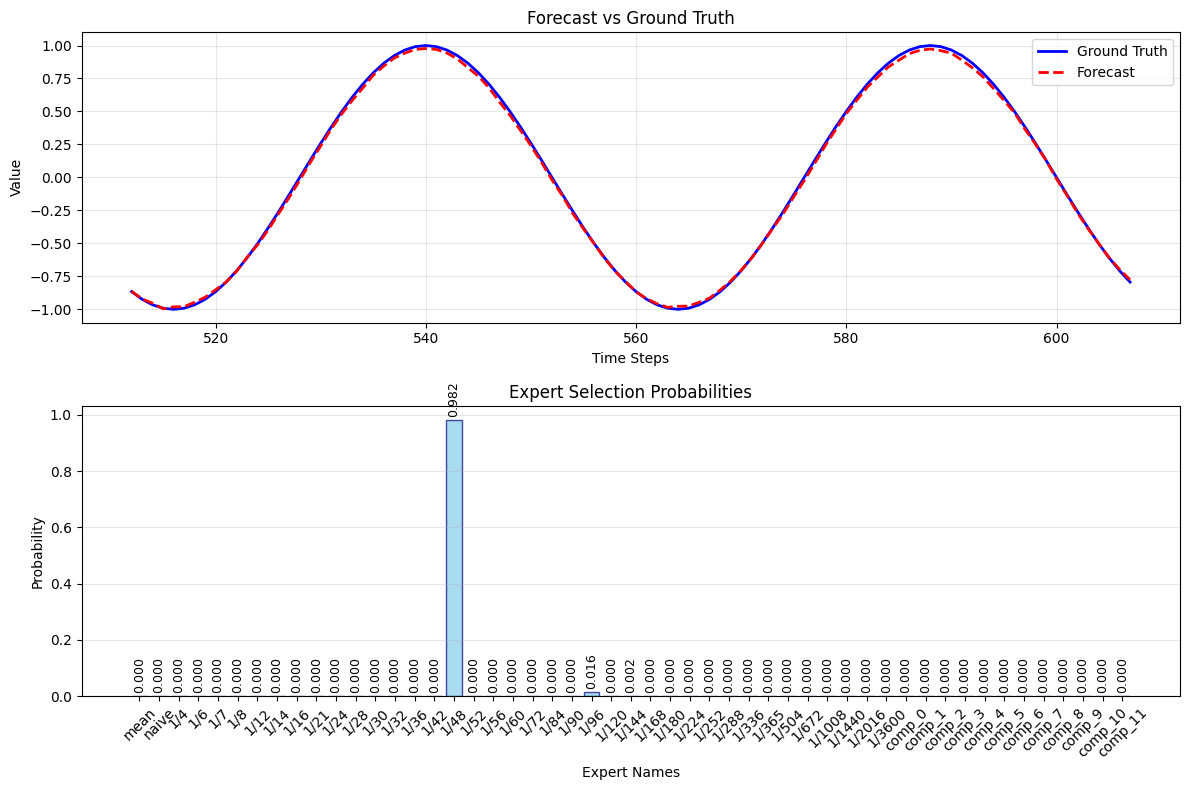

In [4]:
import matplotlib.pyplot as plt

# Convert to numpy for plotting
out_np = out.detach().cpu().numpy().squeeze()
y_np = y.detach().cpu().numpy().squeeze()
prob_np = prob.detach().cpu().numpy().squeeze()

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Forecast vs Ground Truth
time_pred = torch.arange(seq_len, seq_len + pred_len)
ax1.plot(time_pred, y_np, label='Ground Truth', linewidth=2, color='blue')
ax1.plot(time_pred, out_np, label='Forecast', linewidth=2, color='red', linestyle='--')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Value')
ax1.set_title('Forecast vs Ground Truth')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Expert Probabilities
expert_names_list = list(expert_names)
bars = ax2.bar(expert_names_list, prob_np, alpha=0.7, color='skyblue', edgecolor='navy')
ax2.set_xlabel('Expert Names')
ax2.set_ylabel('Probability')
ax2.set_title('Expert Selection Probabilities')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, prob_val in zip(bars, prob_np):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{prob_val:.3f}', ha='center', va='bottom', fontsize=9, color='black', rotation=90)

plt.tight_layout()
plt.show()